[[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]


<ipython-input-22-7c65ed7a3c58>:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


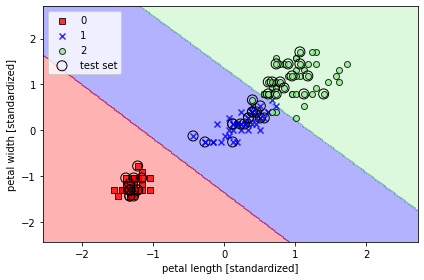

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 


iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.3,random_state = 1, stratify = y)

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))


svm= SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(x_train,y_train)


pred = svm.predict(x_train)
print(confusion_matrix(y_train,pred))

plot_decision_regions(x_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()